In [2]:
import numpy as np
import mlgrad.func as func
import mlgrad.model as model
import mlgrad.sag as sag

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
lm_orig = model.LinearModel([2.,3.])
lm_orig

In [4]:
N1 = 100
X1 = 2*np.random.random((N1,1))
Y1_orig = np.array([lm_orig.evaluate(x) for x in X1])
dY1 = 2.0*np.random.random((N1,))-1
Y1 = Y1_orig + dY1

In [5]:
N2 = 30
X2 = np.random.random((N2,1))-0.5
Y2_orig = np.array([lm_orig.evaluate(x) for x in X2])
dY2 = 2.0*np.random.random((N2,))-1
Y2 = Y2_orig + 2.5*dY2
X2 = X2 + 3.0

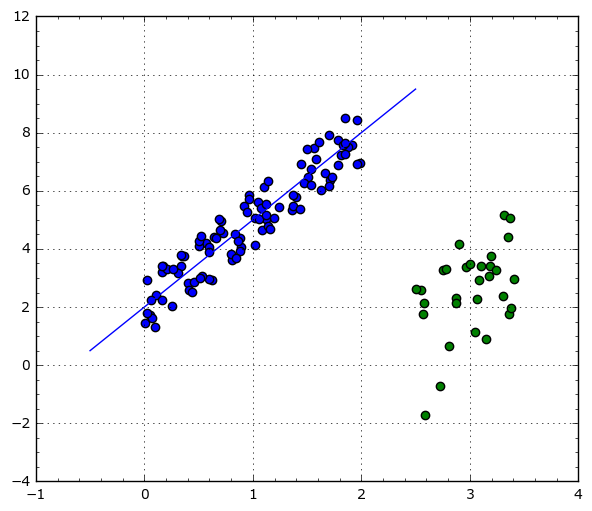

In [6]:
plt.figure(figsize=(7.0, 6.0))
plt.scatter(X1, Y1, s=36, c='b')
plt.scatter(X2, Y2, s=36, c='g')
X_temp = np.array([[-0.5], [2.5]])
plt.plot(X_temp, np.array([lm_orig.evaluate(x) for x in X_temp]))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [7]:
X = np.concatenate((X1, X2))
Y = np.concatenate((Y1, Y2))

In [20]:
loss_func = func.Expectile(0.1)
loss_func

In [21]:
param_init = np.random.random((2,))
lm_learn = model.LinearModel(param_init)

alg = sag.SAG(lm_learn, loss_func,  h=0.0001, tol=1.0e-5, n_iter=5000)
alg.fit(X, Y)
print("K:", alg.K, "h:", alg.h_mean)

K: 4220 h: 0.0001


In [22]:
lm_learn

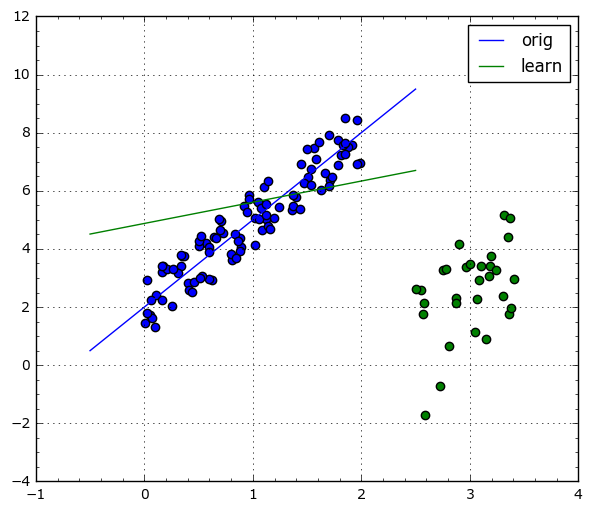

In [23]:
plt.figure(figsize=(7.0, 6.0))
plt.scatter(X1, Y1, s=36, c='b')
plt.scatter(X2, Y2, s=36, c='g')
X_temp = np.array([[-0.5], [2.5]])
plt.plot(X_temp, np.array([lm_orig.evaluate(x) for x in X_temp]), label='orig')
plt.plot(X_temp, np.array([lm_learn.evaluate(x) for x in X_temp]), label='learn')
plt.minorticks_on()
plt.grid(1)
plt.legend(loc='best')
plt.show()